<a href="https://colab.research.google.com/github/raphaelreinauer/Deep_Q_learning/blob/master/Deep_Q_learning_for_Atari_2600.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Q-learning for Atari 2600
This is my implementation of the Deep Q-learning algorithm described in https://www.nature.com/articles/nature14236
for the implementation of an agent learning to play Atari 2600 games by reinforcement learning.

In [0]:
# importing necessary libaries
import gym
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch as T


In [0]:
'''
Constructing a wrapper for preprocessing the frames generated
by the openai atari environment
We will use openai gym wrappers described in
https://github.com/openai/gym/tree/master/gym/wrappers

Furthermore, I used the blog entry:
https://hub.packtpub.com/openai-gym-environments-wrappers-and-monitors-tutorial/
The hirachy is as follows:
Enc -> Wrapper --> ObservationWrapper (redefine observation-method,
                                    input: observation by the environment,
                                    output: observation passed to the agent)
               \-> ActionWrapper (redefine action-method)
               \-> RewardWrapper (redefine reward-method)
'''

class MaxFrame(gym.Wrapper):
    '''
    Returns the maximum of two consecutive frame
    '''
    def __init__(self, env):
        super().__init__(env)

    def step(self, action):
        '''
        Overwrite step function
        input: action
        output: max_frame, total_reward, done, info
        '''
        total_reward = 0
        done = False
        frame_buffer=[]
        for i in range(2):
            obs, reward, done, info = super().step(action)
            total_reward += total_reward
            frame_buffer.append(obs)
            if done:
                break
        # Compute entriwise maximum of the frames in frame_buffer
        max_frame = np.maximum(frame_buffer[0], frame_buffer[1]).astype(int)
        return max_frame, total_reward, done, info


class RescaleGrayscaleFrame(gym.ObservationWrapper):
    '''

    reset observation space to new form

    swapping channel axis (gym.spaces.Box)
    '''
    def observation(self,rescale_shape):
        pass
    
    
    '''
    # from https://www.kite.com/python/answers/how-to-convert-an-image-from-rgb-to-grayscale-in-python
    rgb_weights = [0.2989, 0.5870, 0.1140]

    grayscale_image = np.dot(an_image[...,:3], rgb_weights)
    '''
    '''
    resize image from
    https://stackoverflow.com/questions/48121916/numpy-resize-rescale-image
    img = cv2.imread('your_image.jpg')
    res = cv2.resize(img, dsize=(84, 84), interpolation=cv2.INTER_CUBIC)
    convert back to numpy array
    '''

class StackFrames(gym.ObservationWrapper):
    pass

In [0]:
env = gym.make('PongNoFrameskip-v4')
env = MaxFrame(env)
env.reset();
#env.step(1)[0]

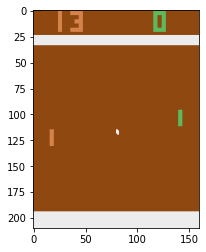

In [78]:
for _ in range(1000):
    plt.imshow(env.step(1)[0])
plt.show()

2


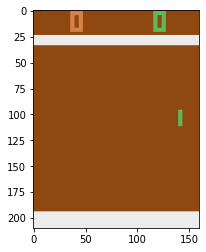

In [66]:
plt.imshow(env.step(1)[0])
plt.show()